In [2]:
from maestro_pizza_maker.pizza_menu import PizzaMenu
from maestro_pizza_maker.pizza import Pizza
from maestro_pizza_maker.ingredients import PizzaIngredients, IngredientType
from maestro_pizza_maker.pizza_sensitivities import menu_sensitivity_protein, \
    menu_sensitivity_carbs, menu_sensitivity_fat
from maestro_pizza_maker.taste_at_risk import taste_at_risk_pizza, taste_at_risk_menu, \
    conditional_taste_at_risk_pizza, conditional_taste_at_risk_menu
from maestro_pizza_maker.pizza_optimizer import PizzaConstraintsValues, \
    PizzaConstraintsIngredients, maximize_taste_penalty_price

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random


In [4]:
import sklearn
from itertools import combinations, product
import statsmodels.api as sm


# Feedback and Comments

Dear reader before your deep dive, let me give some comments and feedback on the present task :-)

* It was really fun working on it, I enjoyed it and think it is an interessting idea to look at pizzas, 
  although I was really disturbed and mildly shocked by the fact that the scikit learn module was *not* part of the requirements.txt :-O
* The task questions and problem definitions were for the most part clearly defined such that there was room 
  to focus only on the scope of the current task or to diverge and explore alternative streams.
* I found the technical side of the implementation challenging since I normally don't code in classes yet. I had to google a lot. 
  Whoever coded it ( my guess would be Martin ) is a clear expert in his field. The code was very clear and well structured, really
  good job done there! I think I could learn a lot from you given the chance ;-). 
* I learned couple of things which were very new to me for example the dataclasses and the utilization of the mip module. The latter in    particular I'll add to my list of libs to try out in more depth later on.
* Having said that, it was a bit difficult to allocate time for the project, therefore I hadn't time to properly document the
  methods in docstring format. An example how I usually do it is given in the method generate_large_pizza_dataset() further down in the notebook.

# Original Pizza Menu

In [202]:
# consider following menu
pizza_menu = PizzaMenu(
    pizzas=[
        Pizza(
            sauce=PizzaIngredients.CREAM_SAUCE,
            dough=PizzaIngredients.CLASSIC_DOUGH,
            cheese=[PizzaIngredients.MOZZARELA],
            fruits=[PizzaIngredients.PINEAPPLE],
            meat=[PizzaIngredients.BACON, PizzaIngredients.HAM],
            vegetables=[PizzaIngredients.ONIONS],
        ),
        Pizza(
            sauce=PizzaIngredients.TOMATO_SAUCE,
            dough=PizzaIngredients.THIN_DOUGH,
            cheese=[PizzaIngredients.CHEDDAR],
            fruits=[PizzaIngredients.APPLE],
            meat=[PizzaIngredients.SAUSAGE],
            vegetables=[PizzaIngredients.MUSHROOMS, PizzaIngredients.PEPPER],
        ),
        Pizza(
            sauce=PizzaIngredients.CREAM_SAUCE,
            dough=PizzaIngredients.WHOLEMEAL_DOUGH,
            cheese=[PizzaIngredients.MOZZARELA, PizzaIngredients.CHEDDAR],
            fruits=[PizzaIngredients.PINEAPPLE, PizzaIngredients.APPLE],
            meat=[
                PizzaIngredients.BACON,
                PizzaIngredients.HAM,
                PizzaIngredients.SAUSAGE,
            ],
            vegetables=[
                PizzaIngredients.MUSHROOMS,
                PizzaIngredients.ONIONS,
                PizzaIngredients.PEPPER,
            ],
        ),
        Pizza(
            sauce=PizzaIngredients.TOMATO_SAUCE,
            dough=PizzaIngredients.CLASSIC_DOUGH,
            cheese=[PizzaIngredients.MOZZARELA],
            fruits=[PizzaIngredients.PINEAPPLE],
            meat=[PizzaIngredients.BACON, PizzaIngredients.HAM],
            vegetables=[PizzaIngredients.ONIONS],
        ),
        Pizza(
            sauce=PizzaIngredients.CREAM_SAUCE,
            dough=PizzaIngredients.THIN_DOUGH,
            cheese=[PizzaIngredients.CHEDDAR],
            fruits=[PizzaIngredients.APPLE],
            meat=[PizzaIngredients.SAUSAGE],
            vegetables=[PizzaIngredients.MUSHROOMS, PizzaIngredients.PEPPER],
        ),
        Pizza(
            sauce=PizzaIngredients.TOMATO_SAUCE,
            dough=PizzaIngredients.WHOLEMEAL_DOUGH,
            cheese=[PizzaIngredients.MOZZARELA, PizzaIngredients.CHEDDAR],
            fruits=[PizzaIngredients.PINEAPPLE, PizzaIngredients.APPLE],
            meat=[
                PizzaIngredients.BACON,
                PizzaIngredients.HAM,
                PizzaIngredients.SAUSAGE,
            ],
            vegetables=[
                PizzaIngredients.MUSHROOMS,
                PizzaIngredients.ONIONS,
                PizzaIngredients.PEPPER,
            ],
        ),
        Pizza(
            sauce=PizzaIngredients.CREAM_SAUCE,
            dough=PizzaIngredients.CLASSIC_DOUGH,
            cheese=[PizzaIngredients.MOZZARELA],
            fruits=[PizzaIngredients.PINEAPPLE],
            meat=[PizzaIngredients.BACON, PizzaIngredients.HAM],
            vegetables=[PizzaIngredients.ONIONS],
        ),
        Pizza(
            sauce=PizzaIngredients.TOMATO_SAUCE,
            dough=PizzaIngredients.THIN_DOUGH,
            cheese=[PizzaIngredients.CHEDDAR],
            fruits=[PizzaIngredients.APPLE],
            meat=[PizzaIngredients.SAUSAGE],
            vegetables=[PizzaIngredients.MUSHROOMS, PizzaIngredients.PEPPER],
        ),
        Pizza(
            sauce=PizzaIngredients.CREAM_SAUCE,
            dough=PizzaIngredients.WHOLEMEAL_DOUGH,
            cheese=[PizzaIngredients.MOZZARELA, PizzaIngredients.CHEDDAR],
            fruits=[PizzaIngredients.PINEAPPLE, PizzaIngredients.APPLE],
            meat=[
                PizzaIngredients.BACON,
                PizzaIngredients.HAM,
                PizzaIngredients.SAUSAGE,
            ],
            vegetables=[
                PizzaIngredients.MUSHROOMS,
                PizzaIngredients.ONIONS,
                PizzaIngredients.PEPPER,
            ],
        ),
        Pizza(
            sauce=PizzaIngredients.TOMATO_SAUCE,
            dough=PizzaIngredients.CLASSIC_DOUGH,
            cheese=[PizzaIngredients.MOZZARELA],
            fruits=[PizzaIngredients.PINEAPPLE],
            meat=[PizzaIngredients.BACON, PizzaIngredients.HAM],
            vegetables=[PizzaIngredients.ONIONS],
        ),
    ]
)


# 1. GET DATA

In [203]:
# create a dataframe with the menu using the to_dataframe method you have implemented in the PizzaMenu class
# and display it
pizza_df = pizza_menu.to_dataframe()
display(pizza_df.head())
print( 'Dimensions of the df:', pizza_df.shape )

,name,price,protein,avg_fat,carbohydrates,calories,ingredients
0,BACON_CLASSIC_DOUGH_CREAM_SAUCE_HAM_MOZZARELA_...,7.6,60.6,235.618469,24.0,1830.0,"[CLASSIC_DOUGH, CREAM_SAUCE, MOZZARELA, PINEAP..."
1,APPLE_CHEDDAR_MUSHROOMS_PEPPER_SAUSAGE_THIN_DO...,6.5,45.5,209.914733,28.0,1070.0,"[THIN_DOUGH, TOMATO_SAUCE, CHEDDAR, APPLE, SAU..."
2,APPLE_BACON_CHEDDAR_CREAM_SAUCE_HAM_MOZZARELA_...,12.6,95.6,376.891402,39.0,2780.0,"[WHOLEMEAL_DOUGH, CREAM_SAUCE, MOZZARELA, CHED..."
3,BACON_CLASSIC_DOUGH_HAM_MOZZARELA_ONIONS_PINEA...,7.5,60.5,235.489226,23.0,1820.0,"[CLASSIC_DOUGH, TOMATO_SAUCE, MOZZARELA, PINEA..."
4,APPLE_CHEDDAR_CREAM_SAUCE_MUSHROOMS_PEPPER_SAU...,6.6,45.6,210.043977,29.0,1080.0,"[THIN_DOUGH, CREAM_SAUCE, CHEDDAR, APPLE, SAUS..."


Dimensions of the df: (10, 7)


Even though 10 Pizzas seem to be a reasonable realistic number for a real menu. This sample size is not a good starting point for any mathematical model building. Hence let us first generate a real data set :-)

To this end we need to make some assumptions:
* the two necessary ingredients are *sauce* and *dough* which we refer to as the fixed part of the combinations
* the ingredients *meat*, *vegetables*, *fruits*, *cheese* are optional. We assume these ingredients can be chosen within each type only once for a given pizza ( e.g. Cheddar, Chaddar is not allowed ). Other than that we may combine as many ingredients as we like.

1) The ingredients *dough* and *sauce* give us in total 6 possible combinations.
2) The number of combinations for optional type constituents is given by the number of combinations without replacement and without sorting using $\frac{n!}{(n-k)!}$, where $n$ refers to the total number of elements in our optional set { 'cheddar', 'parmesan', 'mozzarella', 'ham', 'bacon', 'sausage', 'apple', 'pineapple', 'onions', 'mushrooms', 'pepper'}

From the above for the total number of combinations, we obtain $$ N = 6 \cdot \sum_{k=0}^{11} \frac{n!}{(n-k)!} $$



In [314]:
# Hence we expect the following number of combinations and pizzas in our menu
n = 11
combinations = [np.math.factorial( n )/(np.math.factorial(n-k)*np.math.factorial(k)) for k in list(range(0, 12))]
print('total_number_combinations = ', sum(combinations)*6)

total_number_combinations =  12288.0


# Define a method to generate a large set of pizzas

In [5]:
def generate_large_pizza_dataset():
    
    '''
    This method generates an object of class pizza_menu containing a list
    of all possible pizzas given the fixed ingridient types defined by PizzaIngredients.
    Thereby 'dough' and 'sauce' are declared as leteral ingredients and 
    'meat', 'fruits', 'vegetables' and 'cheese' as optional. Assuming that all
    possible combinations of the latter are allowed, the computation of the combinations
    boils down to the formula $$ N = 6 \cdot \sum_{k=0}^{11} \frac{n!}{(n-k)!} $$. 
    
        Args:
        None
        
        Returns:
        menu_of_available_pizzas ( PizzaMenu): all possible combinations of pizzas.
    '''
    from itertools import combinations
    
    # Define a dict of ingredients by type
    ingredients_by_type = {i_type.value:
                               [ingredient
                                for ingredient in PizzaIngredients
                                    if ingredient.value.type == i_type]
                                       for i_type in IngredientType}


    # Rename misspelled items
    # Q to reader: It was on purporse, right? ;-)
    for items2rename in ['fruit', 'vegetable']:
        item = ingredients_by_type.pop( items2rename )
        ingredients_by_type[ f'{items2rename}s'] = item
    
    
    # Next, to implement the product of the fixed literal ingredients with the cross-combinations
    # of the optional ingredients we separate these entities in { ingredient_combinations,  
    # dough_sauce_combinations }. In this also generating the cross- combinations for
    # the optional ingredients.
    
    # Generate cross-combinations for optional ingredients
    ingredient_combinations = {i_type:
                                [list(composition)
                                     for i in range(len(ingredients)+1)
                                        for composition in combinations(ingredients, i)
                                 ]
                                for i_type, ingredients in ingredients_by_type.items()
                                    if i_type not in ['dough', 'sauce']
                                }

    # Literal ingredients
    dough_sauce_combinations = {i_type:
        [item for item in ingredients]
             for i_type, ingredients in ingredients_by_type.items()
             if i_type in ['dough', 'sauce']
    }

    ingredient_combinations = {**dough_sauce_combinations, **ingredient_combinations}
    
    # Finally, build the product of literal and optional ingredients
    # and append each resulting pizza definition to a PizzaMenu object
    menu_of_available_pizzas = PizzaMenu(pizzas=[])
    ingradient_types = list(ingredient_combinations.keys())
    i=0
    for components in product(*ingredient_combinations.values()):
        i+=1
        pizza_ingredients = dict(zip(ingradient_types, components))
        pizza = Pizza(**pizza_ingredients)
        menu_of_available_pizzas.add_pizza(pizza)


    return menu_of_available_pizzas

In [6]:
pizza_menu = generate_large_pizza_dataset()
print( 'check the number of overall combinations:', pizza_menu.__len__())

check the number of overall combinations: 12288


In [206]:
# compute basic descriptive statistics for the menu.
# pay a special attention to the price column, as it is the most important one

# Following steps are optional, but recommended:
# 1. Create a boxplot for the price column
# 2. Create a histogram for the price column
# 3. Create a scatter plot for the price column and any other column of your choice


In [8]:
# create a dataframe with the menu using the to_dataframe method you have implemented in the PizzaMenu class
# and display it
pizza_df = pizza_menu.to_dataframe()
display(pizza_df.head())
print( 'Dimensions of the df:', pizza_df.shape )

,name,price,protein,avg_fat,carbohydrates,calories,ingredients
0,CLASSIC_DOUGH_TOMATO_SAUCE,1.5,10.5,52.810326,13.0,120.0,"[CLASSIC_DOUGH, TOMATO_SAUCE]"
1,CLASSIC_DOUGH_MUSHROOMS_TOMATO_SAUCE,2.5,15.5,86.229689,18.0,170.0,"[CLASSIC_DOUGH, TOMATO_SAUCE, MUSHROOMS]"
2,CLASSIC_DOUGH_ONIONS_TOMATO_SAUCE,2.5,15.5,82.111419,18.0,170.0,"[CLASSIC_DOUGH, TOMATO_SAUCE, ONIONS]"
3,CLASSIC_DOUGH_PEPPER_TOMATO_SAUCE,2.5,15.5,85.093289,18.0,170.0,"[CLASSIC_DOUGH, TOMATO_SAUCE, PEPPER]"
4,CLASSIC_DOUGH_MUSHROOMS_ONIONS_TOMATO_SAUCE,3.5,20.5,115.530783,23.0,220.0,"[CLASSIC_DOUGH, TOMATO_SAUCE, MUSHROOMS, ONIONS]"


Dimensions of the df: (12288, 7)


# Add additional features for later:
* shares in protein, fat and carbo wrt to the calories
* number of ingredients
* normalised price as price by number of ingredients

In [9]:
# ADD FEATURES
#.....................................................................
# add number of ingredients as a separate col
pizza_df['num_ingredients'] = [ len(x) for x in pizza_df.ingredients ]
# add protein, fat and carbo shares wrt to the calories
for cols in ['avg_fat', 'carbohydrates', 'protein']:
    pizza_df[ f'{cols}_share'] = pizza_df[cols]/pizza_df['calories']
# add normalised price pro ingredient
pizza_df['normalised_price']= pizza_df.price/pizza_df.num_ingredients

# 2. START EDA

In [229]:
# SIMPLE STATS
#.......................................................................
pizza_df.describe()

,price,protein,avg_fat,carbohydrates,calories,num_ingredients,avg_fat_share,carbohydrates_share,protein_share,normalised_price
count,12288.000000,12288.00000,12288.000000,12288.000000,12288.000000,12288.00000,12288.000000,12288.000000,12288.000000,12288.000000
mean,7.550000,58.05000,234.004807,26.000000,1650.000000,7.50000,0.157802,0.019258,0.037418,1.001805
std,1.871573,16.00854,54.549094,5.612714,602.643805,1.65838,0.063130,0.013647,0.008873,0.072492
min,1.500000,10.50000,49.982755,13.000000,120.000000,2.00000,0.084334,0.004452,0.027509,0.750000
25%,6.500000,45.60000,195.975602,23.000000,1130.000000,6.00000,0.122780,0.012454,0.033115,0.936458
50%,7.550000,58.05000,234.200232,26.000000,1650.000000,7.50000,0.141992,0.015730,0.035206,1.002564
75%,8.600000,70.50000,272.223179,29.000000,2170.000000,9.00000,0.171932,0.022222,0.039417,1.067857
max,13.600000,105.60000,419.702927,39.000000,3180.000000,13.00000,0.610237,0.108333,0.095946,1.200000


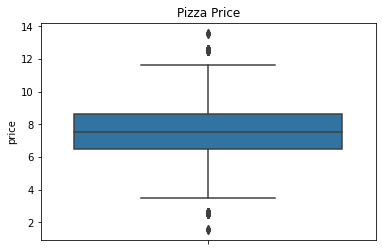

In [230]:
# Some basic visualisations
#..........................
#1. Boxplot for the price
sns.boxplot( data =  pizza_df, y = 'price')
plt.title( 'Pizza Price')
plt.show()

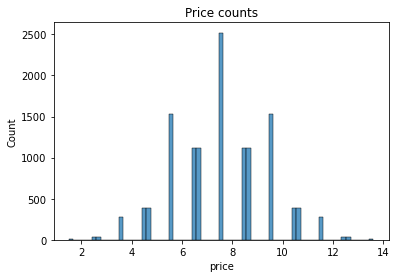

In [231]:
# 2. Histogram for the price
sns.histplot( data = pizza_df, x = 'price')
plt.title( 'Price counts')
plt.show()

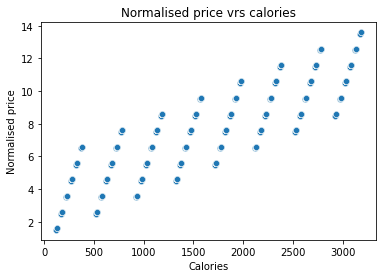

In [232]:
# 3. Scatterplot
sns.scatterplot( data = pizza_df, x = 'calories', y = 'price')
plt.title( 'Normalised price vrs calories')
plt.xlabel('Calories')
plt.ylabel('Normalised price')
plt.show()

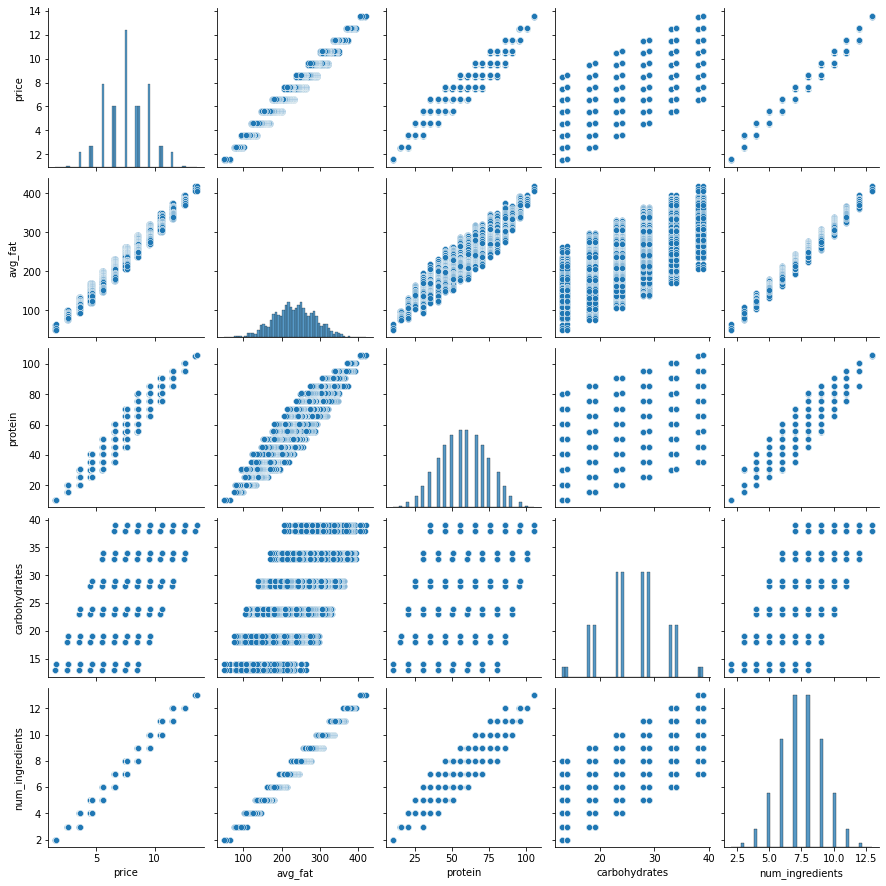

In [233]:
# Finally, have a first glance at the pairplot
cols2select = ['price', 'avg_fat', 'protein', 'carbohydrates', 'num_ingredients']
sns.pairplot(pizza_df[ cols2select ])
plt.show()

#  Observations from the plots:

* Tha data is very synthetic :-)
* Across all relevant variables we observe a lin. relationship price ~ protein, price ~ avg_fat, price ~ carbohydrates, price ~ num_ingredients
* The distributions of the variables also hint at Normal distribution

Next steps:

    * check for normality with qq-plot 
    * check a simple lin correlation matrix for importance of the vars
    * check RF for feature importance and price ~ avg_fat + protein + carbohydrates
    * check also the simple sensitivities from the task below

* TODO: Add a note to the menu. "Dear customer a high protein, high fat pizza will not only send you to an early grave but will probably also contribute for not being able to pay for it. Please proceed at you own risk."

# Check Normality visually

In [234]:
def normalize_data( x :list ):
    '''
    This is a small helper to normalize the data.
        Args:
        x ( list ): List of data points to be normalised
        Returns:
        x ( list ): List of normalised data according to x-> (x-mean(x))/sqr(var(x))
    '''
    return (x-np.mean(x))/np.math.sqrt( np.var(x))

/home/kappa/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


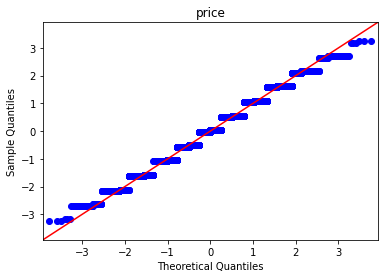

/home/kappa/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


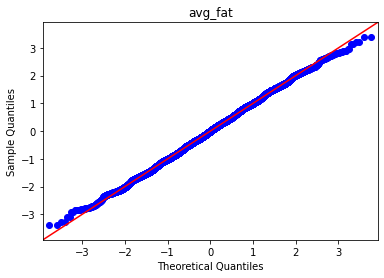

/home/kappa/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


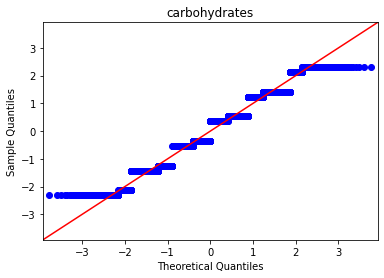

/home/kappa/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


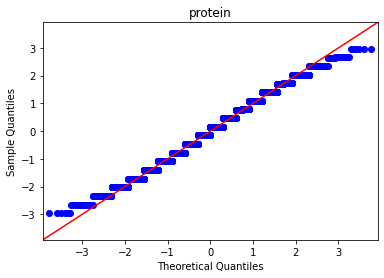

In [235]:
# Generate qq-plot for normalised variables
for col in ['price', 'avg_fat', 'carbohydrates', 'protein']:
    sm.qqplot( normalize_data( pizza_df[col] ), line = '45')
    plt.title(col)
    plt.show()



* Comment: the hint seems to be true to the largest extent. The tails of the carbohydrates deviate from the normal the most, other than that we can assume $ X \sim  N( \mu, \sigma^2 )$ for the other vars.

# RF - Model

In [20]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV,\
RandomizedSearchCV
from sklearn.inspection import permutation_importance

In [21]:
# Consider only numerical cols of the initial df
numerics = ['float64', 'int64']
pizza_rf_df = pizza_df.select_dtypes(include= numerics).sample(1000)
pizza_rf_df.head()

,price,protein,avg_fat,carbohydrates,calories,num_ingredients,avg_fat_share,carbohydrates_share,protein_share,normalised_price
3857,7.5,60.5,233.295772,23.0,1820.0,7,0.128184,0.012637,0.033242,1.071429
10735,9.6,70.6,307.310286,34.0,1930.0,10,0.159228,0.017617,0.036580,0.960000
9788,9.6,70.6,291.972124,34.0,1930.0,9,0.151281,0.017617,0.036580,1.066667
6206,6.6,40.6,209.988933,34.0,730.0,7,0.287656,0.046575,0.055616,0.942857
9795,6.6,55.6,196.127767,19.0,1780.0,6,0.110184,0.010674,0.031236,1.100000


# Have a quick glance at the correlation matrix

In [238]:
corr_df = pizza_df[['price', 'protein', 'avg_fat', 'carbohydrates', 'calories', 'num_ingredients']].corr()

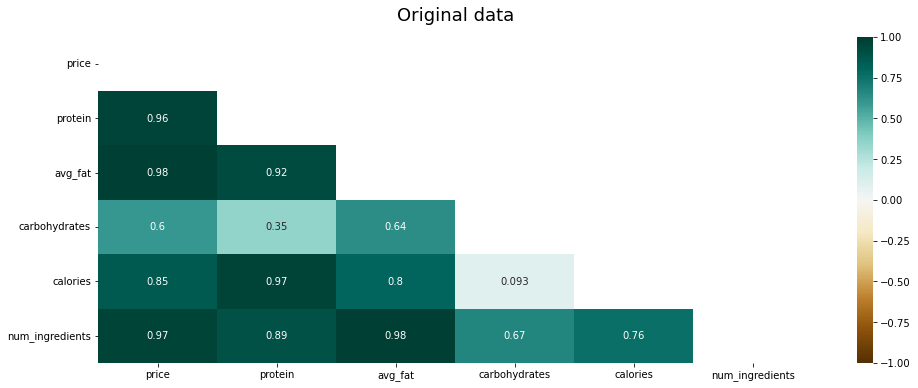

In [239]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like((corr_df), dtype=bool))
ax = sns.heatmap(corr_df, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
ax.set_title('Original data', fontdict={'fontsize':18}, pad=16);

In [240]:
corr_df = pizza_df[['normalised_price', 'protein_share', 'avg_fat_share', 'carbohydrates_share']].corr()

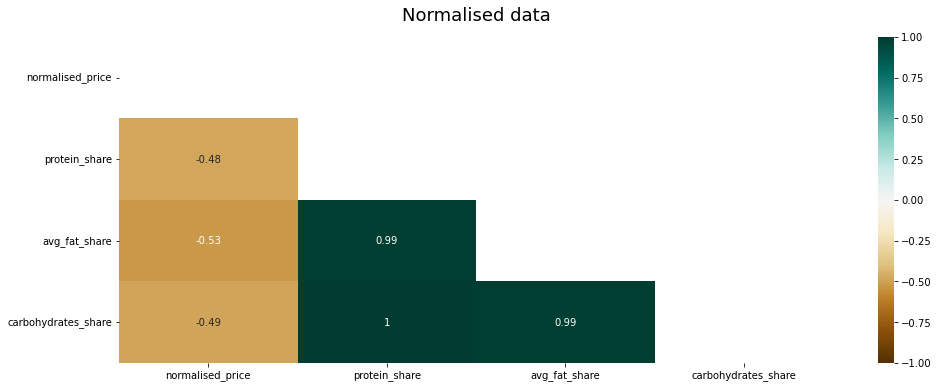

In [241]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like((corr_df), dtype=bool))
ax = sns.heatmap(corr_df, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
ax.set_title('Normalised data', fontdict={'fontsize':18}, pad=16);

   Observation on the lin. correlations
   * Original data: the strongest (apart from num_ingredients ) is given by price ~ protein and price ~avg_fat
   * Normalised data: the strongest is by avg_fat followed by equally correlates protein and carbs. For the normalised quantities the correlation is negative.
   * In general a strong co-linearity of the variables is present which introduces noise into the system

In [242]:
# Train RF model on both sets of features ( original and normalised )
# -- compare the feature importance 
# -- compare the RMSE score

In [12]:
price_target  = ['normalised_price', 'price' ]
feature_list  = [ ['protein_share', 'avg_fat_share', 'carbohydrates_share'],\
                 ['protein', 'avg_fat', 'carbohydrates', 'num_ingredients', 'calories']
                  ]
price_target  = ['normalised_price', 'price' ]

In [14]:
x = pizza_df[feature_list[0]]
y = pizza_df[price_target[0]]

In [17]:
# Scale before normalising
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = MinMaxScaler()
x = sc.fit_transform( x )
#y = sc.fit_transform( y ) 

In [39]:
from itertools import chain
cols2select = list( chain(*[['normalised_price']], ['protein_share', 'avg_fat_share', 'carbohydrates_share'] ))
cols2select
pizza_rf_df = pizza_df[cols2select]
pizza_rf_df = sc.fit_transform( pizza_rf_df )

In [83]:
x = pizza_df[feature_cols]
y = pizza_df[target_cols]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


In [86]:
y_test

(2458,)

In [74]:
        sc  = MinMaxScaler()
        x_train = sc.fit_transform( x_train )        
        x_test = sc.fit_transform( x_test )        
        y_train = sc.fit_transform( y_train.values.reshape(-1, 1) )        
        y_test = sc.fit_transform( y_test.values.reshape(-1, 1) )
        

In [76]:
a, b, c, d = [sc.fit_transform(x) for x in [x_train, x_test, y_train, y_test ]]

In [87]:
d.ravel()

array([0.325     , 0.58333333, 0.40833333, ..., 0.58333333, 0.74166667,
       0.41666667])

In [114]:
scale_before_rf = False
price_target  = ['normalised_price', 'price' ]
feature_list  = [ ['protein_share', 'avg_fat_share', 'carbohydrates_share'],\
                 ['protein', 'avg_fat', 'carbohydrates', 'num_ingredients', 'calories']
                  ]

stat_df = pd.DataFrame()
for target_cols, feature_cols in zip( price_target, feature_list ):
    print('Process target:', target_cols )    
     
    # Define target column and feature df
    x = pizza_df[feature_cols]
    y = pizza_df[target_cols]
        
    # Train/Test split with 80/20
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
    
    
    
    if scale_before_rf:
        sc  = MinMaxScaler()        
        y_test  = y_test.ravel()
        y_train = y_train.ravel()
        x_train = sc.fit_transform( x_train )        
        x_test  = sc.fit_transform( x_test )        
        
    
    # Specify GrigSearch for hyperparameter tuning
    param_grid = {
                    'n_estimators': [150,250,350,450],
                    'max_features': ['sqrt', 'log2', None],
                    'max_depth': [3, 6, 9],
                    'max_leaf_nodes': [3, 6, 9],
                 }
    # Hyperparam tuning
    grid_search = GridSearchCV(RandomForestRegressor(), param_grid=param_grid)
    grid_search.fit(x_train, y_train)
    print('Best params:', grid_search.best_estimator_)
    
    # Define the final model
    model = RandomForestRegressor(n_estimators  = grid_search.best_estimator_.n_estimators,\
                                  random_state  = 3452, \
                                  max_depth     = grid_search.best_estimator_.max_depth,\
                                  max_features  = grid_search.best_estimator_.max_features,\
                                  max_leaf_nodes= grid_search.best_estimator_.max_leaf_nodes )
    # Fit the mdl
    model.fit(x_train, y_train)     
    y_pred = model.predict(x_test)
    
    # RMSE
    rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
    stat_df = stat_df.append( pd.DataFrame( {'rmse': rmse, 'features':[feature_cols], 'importance': [model.feature_importances_] } ))
 


Process target: normalised_price
Best params: RandomForestRegressor(max_depth=6, max_features=None, max_leaf_nodes=9,
                      n_estimators=450)
Process target: price
Best params: RandomForestRegressor(max_depth=9, max_features='sqrt', max_leaf_nodes=9,
                      n_estimators=150)


In [115]:
stat_df = stat_df.reset_index()

In [116]:
# Output
print( f'Scaling state { str(scale_before_rf) }')
print( 'Normalised data RMSE:', stat_df.rmse[0])
print( 'Original data RMSE:', stat_df.rmse[1])

Scaling state False
Normalised data RMSE: 0.042
Original data RMSE: 0.302


In [113]:
# Output
print( f'Scaling state { str(scale_before_rf) }')
print( 'Normalised data RMSE:', stat_df.rmse[0])
print( 'Original data RMSE:', stat_df.rmse[1])

Scaling state True
Normalised data RMSE: 0.047
Original data RMSE: 0.302


In [245]:
print( 'Normalised data RMSE:', stat_df.rmse[0])
print( 'Original data RMSE:', stat_df.rmse[1])

Normalised data RMSE: 0.049
Original data RMSE: 0.286


As expected the normalised features yield better results due to reduced noise.

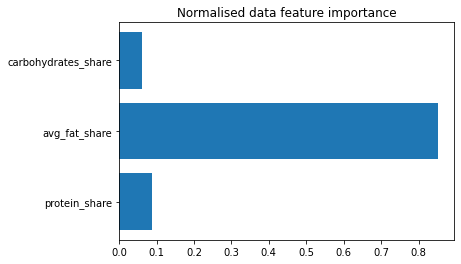

In [246]:
plt.barh(stat_df.features[0], stat_df.importance[0])
plt.title('Normalised data feature importance')
plt.show()


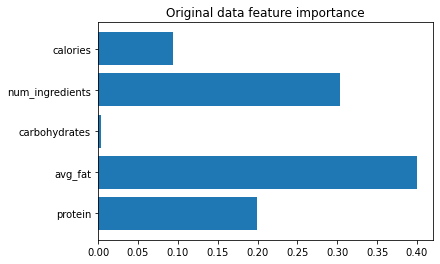

In [247]:
plt.barh(stat_df.features[1], stat_df.importance[1])
plt.title('Original data feature importance')
plt.show()

In the normalised features we observe that the price per ingredient in the pizza is sensitive to the regressors in the following order

* avg_fat_share
* protein_share
* carbohydrates_share

For the non-normalised input we find that the sensitivity of the price is sensitive to the ingredients in the following order

* protein
* avg_fat
* carbs

Whilst both approaches hint that price is least sensitive with regard to the carb, the sensitivity wrt avg_fat and protein are different.
I would argue that the normalised solution describes the system more fully than the original data since it also accounts for the number
of ingredients and links avg_fat, carbs and proteins with each other over the calories.


 Now the actual task....

# Sensitivity

In [248]:
sens_output = 'On average, the price of pizza will increase by about {} cents per each additional unit of {}'

# 1. How much will price change on average if we increase the amount of protein in the pizza by 1 unit?
sensitivity_price_to_protein = menu_sensitivity_protein(pizza_menu)
print(sens_output.format(round(sensitivity_price_to_protein*100, 0), 'protein'))

# 2. How much will price change on average if we increase the amount of average_fat in the pizza by 1 unit?
sensitivity_price_to_fat = menu_sensitivity_fat(pizza_menu)
print(sens_output.format(round(sensitivity_price_to_fat*100, 0), 'average fat'))

# 3. How much will price change on average if we increase the amount of carbohydrates in the pizza by 1 unit?
sensitivity_price_to_carbs = menu_sensitivity_carbs(pizza_menu)
print(sens_output.format(round(sensitivity_price_to_carbs*100, 0), 'carbohydrates'))

# Hint: use functions that you have implemented in the pizza_sensitivities.py

On average, the price of pizza will increase by about 11.0 cents per each additional unit of protein
On average, the price of pizza will increase by about 3.0 cents per each additional unit of average fat
On average, the price of pizza will increase by about 20.0 cents per each additional unit of carbohydrates


# TaR

In [ ]:
# Compute Taste at Risk (TaR) for each pizza in the menu and for the whole menu and briefly comment on the results
# Use quantile = 0.1

First understand the taste variable a bit better:

In [249]:
# take a look at the taste matrix
taste_mat = np.transpose( np.array([pizza.taste for pizza in  pizza_menu.pizzas]))

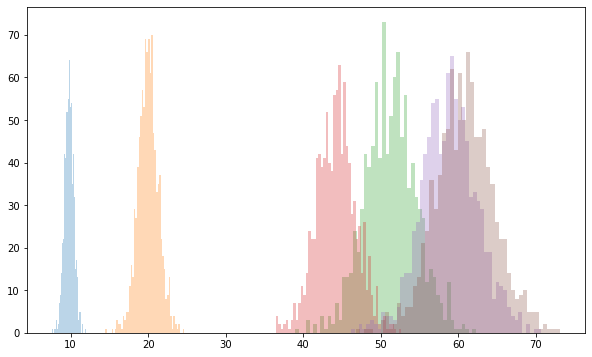

In [250]:
n = [1, 100, 500, 5000, 12000, 12200]
ax = plt.figure(figsize=(10,6))
for k in n:
    plt.hist( taste_mat[:, k], bins = 50, alpha = 0.3 )
plt.show()


So, what would be the 'overall' taste of the pizza_menu? Currently I see 2 possibilities at hand in defining the overall menu taste score

* Sum of all tastes of individual pizzas in the menu, i.e. if a menu contains $N$ pizzas than the overall taste $T$ would be defined as $$ \mathbf{T} = \sum_k^N \mathbf{t}_k$$ where $\mathbf{t}_k \in \mathbb{R}^m$ is a vector in the 'taste' vector space of dimension $m$. 
* Using the definition of the average taste, with $$ \mathbf{T} = \frac{1}{N}\,\sum_k \mathbf{t}_k$$.

The former definition of taste utilizing the sum resambles more a real world situation with a portfolio with assets. Since TaR also mimicks the financial VaR we stick with the definition using the sum in what follows below. 

Next, the definition of the risk metrik for the taste. In an actual portfolio we have the expectation portfolio loss value which sets for us a reference scale which is $E[X] = 0$ and we know that when we are below zero $ E[X] <0 $ we loose and otherwise we win. For the taste variable there exist no zero in that sense, so the most suitable refrence value is the expectation value of the taste $E[\mathbf{T}]$. Hence we can define the metric as the deviation of the quantile from the expected: $E[\mathbf{T}] - q_{k}[\mathbf{T}]$.

In [251]:
quantile = 0.1

# the overall menu first  
menu_tar = taste_at_risk_menu(pizza_menu, quantile)
print('{:.1f}% Overall Taste at Risk for pizza menu is {:.2f}'.format(quantile*100, menu_tar ))

# sum of pizzas tar 
sum_of_pizzas_tar = sum(taste_at_risk_pizza(pizza, quantile) for pizza in pizza_menu.pizzas)
print('The sum of {:.1f}% Taste at Risk for combined individual pizzas is {:.2f}'.format(quantile*100, sum_of_pizzas_tar ))

10.0% Overall Taste at Risk for pizza menu is 41040.75
The sum of 10.0% Taste at Risk for combined individual pizzas is 41129.31


As expected we observe that  $\text{TaR}[ p_{m}] \le \text{TaR}[ p_{s} ]$  where $p_m$ denotes the pizza menu and $p_s$ the sum of pizzas.
The mathematical explanaition is rather simple and boils down to the fact that the $\text{TaR}$ operation is *not linear* and *similar* to taking the expectation value $$E[(X+Y)^2] = E[X]^2+E[Y]^2+2 E[X]\cdot E[Y] \cdot \rho(X, Y) \neq (E[X]+E[Y])^2$$ it results in the presence of mixed terms with the presence of the covariance matrix. Since the correlation between the random content of fat in pizzas is not perfect the lhs in the equation above is smaller than the rhs. In particular this implies that the probability of the joint distribution in the pizza menu for very low fat is lower leading to the higher cutoff value required for the overall menu fat to fall below at a given probability (less heavy tails ).


In [252]:
# Compute Conditional Taste at Risk (CTaR) for each pizza in the menu and for the whole menu and briefly comment on the results
# Hint: use functions that you have implemented in the taste_at_risk.py

# overall menu conditional tar
conditional_pizza_menu_tar = conditional_taste_at_risk_menu(pizza_menu, quantile)
print('{:.1f}% Conditional Taste at Risk for pizza menu is {:.2f}'.format(quantile*100, conditional_pizza_menu_tar ))

# sum of pizzas conditional tar
sum_of_pizzas_conditional_tar = sum(conditional_taste_at_risk_pizza(pizza, quantile) for pizza in pizza_menu.pizzas)
print('The sum of {:.1f}% Coditional Taste at Risk for pizzas from menu is {:.2f}'.format(quantile*100, sum_of_pizzas_conditional_tar))

10.0% Conditional Taste at Risk for pizza menu is 57812.65
The sum of 10.0% Coditional Taste at Risk for pizzas from menu is 58647.77


The result is similar to the previous one, but conditional TaR metrics may be more appropriate for calculation of downside risk since it accounts for losses that occur if negative scenarios do realize.

# Optimization

Here, we want to find an optimal pizza with minimal price and maximum taste. Since the taste is given mainly by the fat of the ingredients we will have to include the expected value of fat - denoted by $v_{i,j,k^{\ast}}$ - of the ingredients and the associateted ingridient weights $w_{i}$  defined as $ \mathbf{w} = ( 0.05,  0.2,  0.3,  0.1,  0.3,  0.05 ) $ for the ingredient types *dough*, *sauce*, *cheese*, *meat*, *vegetables* and *fruits*. Since the allowed ingredient types will be determined by the ingredient constraints and not all of them will be necessarily present, we need to introduce a $\delta$ - Kronecker similar function $\delta_{i,j}$ which accounts for the presence of the ingredient type. The second term will be the penalty price term given by the 'regularisation' parameter $\lambda$ and the price of the ingredients $p_{i, j}$. Hence we end up with the objective function


$$\sum_{i,j} w_i v_{i,j,k^{\ast}}\delta_{i,j}-\lambda \sum_{i,j} p_{i,j}\delta_{i,j} \rightarrow \max$$

subject to $$ \sum_j x_{i,j} = n_i, \hspace{1cm} i = 1, \dotsc, 6$$

$$ v_k^{\min}\le\sum_{i,j} v_{i,j,k} \delta_{i,j} \le v_k^{max}, \hspace{1cm} k = 1, \dotsc, 4$$

$$ \delta_{i,j} = 0 \lor 1 $$.

Here $n_i$ is the number of ingredients of type $i$. Further  $v_{i,j,k}$ is a content of ingredient $j$ of type $i$ and $k^{\ast}$ specifically refers to the mean fat content index.

In [253]:
# Define constraints_values and constraints_ingredients and find the optimal pizza using the func maximize_taste_penalty_price, that you have implemented in the pizza_optimizer.py
# Use lambda_param = 0.5
constraints_values = PizzaConstraintsValues()
constraints_ingredients = PizzaConstraintsIngredients(cheese=1, meat=1, vegetables=1)

opt_pizza = maximize_taste_penalty_price(
    constraints_values,
    constraints_ingredients,
    lambda_param = 0.5
)
print('optimal pizza recipe:', [i.value.name for i in opt_pizza.ingredients])
opt_pizza_df = pd.DataFrame(index = [ingredient.value.name for ingredient in opt_pizza.ingredients],
                            data = {'prices':[ingredient.value.price for ingredient in opt_pizza.ingredients],
                                    'mean fat': [ingredient.value.fat.mean() for ingredient in opt_pizza.ingredients]})
opt_pizza_df


Cgl0002I 2 variables fixed
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cgl0015I Clique Strengthening extended 0 cliques, 0 were dominated
Cbc3007W No integer variables
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 12 small elements
Coin0506I Presolve 0 (-14) rows, 0 (-16) columns and 0 (-132) elements
Clp0000I Optimal - objective value 31.332429
Coin0511I After Postsolve, objective 31.332429, infeasibilities - dual 42.99787 (9), primal 0 (0)
Coin0512I Presolved model was optimal, full model needs cleaning up
Clp0006I 0  Obj 31.332429 Dual inf 17.862153 (9)
Clp0000I Optimal - objective value 31.332429
Clp0032I Optimal objective 31.33242949 - 5 iterations time 0.002, Presolve 0.00

Starting MIP optimization
optimal pizza recipe: ['CLASSIC DOUGH', 'TOMATO SAUCE', 'MOZZRELA', 'HAM', 'MUSH

,prices,mean fat
CLASSIC DOUGH,1.0,31.952148
TOMATO SAUCE,0.5,32.146039
MOZZRELA,1.0,36.337607
HAM,2.0,44.650615
MUSHROOMS,1.0,35.182953


In [254]:
# Add this pizza to the menu using the add_pizza method of the PizzaMenu class
pizza_menu.add_pizza(opt_pizza)

Pizza with such ingredients already exisits in menu


:-D upps....turns out I already have every possible combination including the optimal pizza in the menu...hence..

Generate another menu by randomly deleting the half of the pizzas from the pizza_menu
Rerun...TaR
Calc opt_pizza
Add opt_pizza
Rerun....TaR

In [255]:
# Define a rondom set of pizzas to be removed from the pizza_menu
dim_menu = int(pizza_menu.__len__())
set2remove = random.sample(range(0, dim_menu), int( np.floor(dim_menu/2) ))
pizza_set = [ pizza_menu.pizzas[k] for k in set2remove ]

In [256]:
# Remove the random set from the menu
for pizza in pizza_set:
    pizza_menu.remove_pizza(pizza)
print( pizza_menu.__len__())

6144


In [257]:
# Recalculate TaR with smaler pizza_menu
quantile = 0.1
# Compute the new TaR and CTaR for the whole new menu with added pizza
print('{:.1f}% Taste at Risk for pizza menu is {:.2f}'.format(quantile*100, taste_at_risk_menu(pizza_menu, quantile)))
print('{:.1f}% Coditional Taste at Risk for pizza menu is {:.2f}'.format(quantile*100, conditional_taste_at_risk_menu(pizza_menu, quantile)))


10.0% Taste at Risk for pizza menu is 20532.97
10.0% Coditional Taste at Risk for pizza menu is 28937.68


In [258]:
# Calc the optimal pizza
constraints_values = PizzaConstraintsValues()
constraints_ingredients = PizzaConstraintsIngredients(cheese=1, meat=1, vegetables=1)

opt_pizza = maximize_taste_penalty_price(
    constraints_values,
    constraints_ingredients,
    lambda_param = 0.5
)
print('optimal pizza recipe:', [i.value.name for i in opt_pizza.ingredients])
opt_pizza_df = pd.DataFrame(index = [ingredient.value.name for ingredient in opt_pizza.ingredients],
                            data = {'prices':[ingredient.value.price for ingredient in opt_pizza.ingredients],
                                    'mean fat': [ingredient.value.fat.mean() for ingredient in opt_pizza.ingredients]})
opt_pizza_df


Cgl0002I 2 variables fixed
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cgl0015I Clique Strengthening extended 0 cliques, 0 were dominated
Cbc3007W No integer variables
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.01

Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 12 small elements
Coin0506I Presolve 0 (-14) rows, 0 (-16) columns and 0 (-132) elements
Clp0000I Optimal - objective value 31.332429
Coin0511I After Postsolve, objective 31.332429, infeasibilities - dual 42.99787 (9), primal 0 (0)
Coin0512I Presolved model was optimal, full model needs cleaning up
Clp0006I 0  Obj 31.332429 Dual inf 17.862153 (9)
Clp0000I Optimal - objective value 31.332429
Clp0032I Optimal objective 31.33242949 - 5 iterations time 0.002, Presolve 0.00, Idiot 0.00

Starting MIP optimization
optimal pizza recipe: ['CLASSIC DOUGH', 'TOMATO SAUCE', 'MOZZRELA', 

,prices,mean fat
CLASSIC DOUGH,1.0,31.952148
TOMATO SAUCE,0.5,32.146039
MOZZRELA,1.0,36.337607
HAM,2.0,44.650615
MUSHROOMS,1.0,35.182953


In [259]:
# Add optimal pizza and rerun TaR
pizza_menu.add_pizza(opt_pizza)
#Compute the new TaR and CTaR for the whole new menu with added pizza
print('{:.1f}% Taste at Risk for pizza menu is {:.2f}'.format(quantile*100, taste_at_risk_menu(pizza_menu, quantile)))
print('{:.1f}% Coditional Taste at Risk for pizza menu is {:.2f}'.format(quantile*100, conditional_taste_at_risk_menu(pizza_menu, quantile)))


10.0% Taste at Risk for pizza menu is 20535.03
10.0% Coditional Taste at Risk for pizza menu is 28940.80


In [10]:
# Compare old and new TaR and CTaR and briefly comment on the results.

New TaR and CTaR metrics are a *notch* higher but this is only due to the greater portfolio value (the size of pizza menu). A similar procedure is also performed in incremental VaR to test a portfolio sensitivity wrt to a specific asset of interest.

### OFF - TOPIC
Consider the relation between lambda and the price/fat content

In [260]:
lambda_df = pd.DataFrame()
constraints_values = PizzaConstraintsValues()
constraints_ingredients = PizzaConstraintsIngredients(cheese=3, meat=1, vegetables=1)
for lambda_param in np.arange(0, 1.1, 0.1):  


    opt_pizza = maximize_taste_penalty_price(
                constraints_values,
                constraints_ingredients,
                lambda_param = lambda_param
                )
    
    lambda_df = lambda_df.append({'opt_pizza_price':opt_pizza.price, 'opt_pizza_fat':opt_pizza.average_fat,\
                                  'lambda':lambda_param}, ignore_index=True)


Cgl0002I 2 variables fixed
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cgl0015I Clique Strengthening extended 0 cliques, 0 were dominated
Cbc3007W No integer variables
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 12 small elements
Coin0506I Presolve 0 (-14) rows, 0 (-16) columns and 0 (-132) elements
Clp0000I Optimal - objective value 52.245536
Coin0511I After Postsolve, objective 52.245536, infeasibilities - dual 29.134764 (7), primal 0 (0)
Coin0512I Presolved model was optimal, full model needs cleaning up
Clp0006I 0  Obj 52.245536 Dual inf 14.128208 (7)
Clp0000I Optimal - objective value 52.245536
Clp0032I Optimal objective 52.24553617 - 4 iterations time 0.002, Presolve 0.00, Idiot 0.00

Starting MIP optimization
Cgl0002I 2 variables fixed
Cgl0004I processed model has 0 rows, 0 c

In [261]:
lambda_df['most_fat_pizza_fat'] = pizza_menu.get_most_fat_pizza().average_fat
lambda_df['most_fat_pizza_price'] = pizza_menu.get_most_fat_pizza().price
lambda_df['most_cheap_pizza_fat'] = pizza_menu.cheapest_pizza.average_fat
lambda_df['most_chaep_pizza_price'] = pizza_menu.cheapest_pizza.price

In [262]:
lambda_df

,opt_pizza_price,opt_pizza_fat,lambda,most_fat_pizza_fat,most_fat_pizza_price,most_cheap_pizza_fat,most_chaep_pizza_price
0,7.6,240.856132,0.0,419.702927,13.6,64.098187,1.5
1,7.6,240.856132,0.1,419.702927,13.6,64.098187,1.5
2,7.6,240.856132,0.2,419.702927,13.6,64.098187,1.5
3,7.5,240.726888,0.3,419.702927,13.6,64.098187,1.5
4,7.5,240.726888,0.4,419.702927,13.6,64.098187,1.5
5,7.5,240.726888,0.5,419.702927,13.6,64.098187,1.5
6,7.5,240.726888,0.6,419.702927,13.6,64.098187,1.5
7,7.5,240.726888,0.7,419.702927,13.6,64.098187,1.5
8,7.5,240.726888,0.8,419.702927,13.6,64.098187,1.5
9,7.5,240.726888,0.9,419.702927,13.6,64.098187,1.5


Almost independent on lambda the optimizer gives us an optimal pizza 'half way' in *taste* and *price* between the most cheap and the most fat pizza.

In [ ]:
 # K-MEANS

In [ ]:
# Have a short glance if K-Means can generate reasonable clusters

In [263]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler

In [264]:
pizza_df = pizza_menu.to_dataframe()
pizza_df['num_ingredients'] = len(pizza_df.ingredients)

In [265]:
# ADD FEATURES
#.....................................................................
# add number of ingredients as a separate col
pizza_df['num_ingredients'] = [ len(x) for x in pizza_df.ingredients ]
# add protein, fat and carbo shares wrt to the calories
for cols in ['avg_fat', 'carbohydrates', 'protein']:
    pizza_df[ f'{cols}_share'] = pizza_df[cols]/pizza_df['calories']
# add normalised price pro ingredient
pizza_df['normalised_price']= pizza_df.price/pizza_df.num_ingredients

In [266]:
# Rescale
feature_cols = [ 'avg_fat_share', 'carbohydrates_share', 'protein_share', 'normalised_price']
scaler = MinMaxScaler()
scale = scaler.fit_transform(pizza_df[feature_cols])
df_scale = pd.DataFrame(scale, columns = feature_cols)
df_scale.head(5)

,avg_fat_share,carbohydrates_share,protein_share,normalised_price
0,0.861427,1.000000,0.876589,0.000000
1,0.937815,0.976406,0.930309,0.185185
2,0.994377,0.963536,0.959611,0.277778
3,0.962747,0.963536,0.959611,0.277778
4,0.972467,0.963536,0.959611,0.277778


In [267]:
wss = []
for k in range(2, 15):
    kmeans=cluster.KMeans(n_clusters=k, init = 'k-means++', max_iter=300, tol=0.0001)
    kmeans=kmeans.fit(df_scale)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

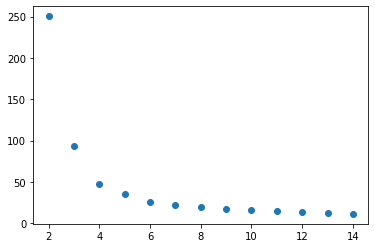

In [268]:
plt.scatter( x = list(range(2, 15)), y = wss)
plt.show()



In [269]:
k_opt= 4
kmeans=cluster.KMeans(n_clusters=k_opt)
kmeans=kmeans.fit(df_scale)
pizza_df['cl'] = kmeans.labels_

In [170]:
cl_summary_df = pizza_df.groupby('cl').agg( avg_cl_price = ('normalised_price', np.mean ), avg_cl_fat = ('avg_fat_share', np.mean), \
                                            avg_cl_cal   = ('calories', np.mean ), avg_cl_num_ingredients = ('num_ingredients', np.mean ),\
                                            avg_cl_carb  = ('carbohydrates_share', np.mean), avg_cl_protein = ('protein_share', np.mean))
cl_summary_df['cl_size'] = pizza_df.groupby('cl')['name'].count()/pizza_df.shape[0]*100
cl_summary_df

,avg_cl_price,avg_cl_fat,avg_cl_cal,avg_cl_num_ingredients,avg_cl_carb,avg_cl_protein,cl_size
cl,,,,,,,
0,1.071598,0.127514,2050.274241,8.020242,0.013352,0.033624,49.845403
1,0.925030,0.244583,796.304676,6.357466,0.037189,0.049278,10.789260
2,0.935796,0.158975,1421.367558,7.315358,0.018659,0.036964,37.721725
3,0.895540,0.533603,254.059406,4.574257,0.104155,0.091793,1.643613


In [185]:
# Calc cluster averages on scaled vars for better comparison later on

In [270]:
df_scale['cl'] = kmeans.labels_
cl_summary_df  = df_scale.groupby('cl').agg( avg_cl_price = ('normalised_price', np.mean ), avg_cl_fat = ('avg_fat_share', np.mean), \
                                             avg_cl_carb  = ('carbohydrates_share', np.mean), avg_cl_protein = ('protein_share', np.mean))
cl_summary_df['cl_size'] = pizza_df.groupby('cl')['name'].count()/pizza_df.shape[0]*100
cl_summary_df

,avg_cl_price,avg_cl_fat,avg_cl_carb,avg_cl_protein,cl_size
cl,,,,,
0,0.714922,0.080887,0.085642,0.089288,50.138324
1,0.411915,0.129786,0.124961,0.125745,33.002441
2,0.396660,0.275236,0.281668,0.284923,15.280716
3,0.319571,0.857766,0.960266,0.938775,1.578519


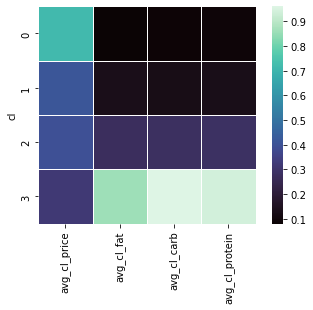

In [271]:
sns.heatmap(cl_summary_df[['avg_cl_price', 'avg_cl_fat', 'avg_cl_carb', 'avg_cl_protein']], cmap="mako", linewidth=1, linecolor='w', square=True)
plt.show()

The most defining distinguishing variable for the clusters is indeed price.

* $cl_0$ is with 50 % the largest cluster but also the most pricely with very low fat content, so we would be spending lot of money for     not particularly tasty, very healthy ( lot of protein ) pizza
* $cl_1$ is a neutral pizza its average in everything, price and content
* $cl_2$  with 33 % the second largest cluster would be mid price low content almost as worse as $cl_0$
* $cl_3$ is rather cheap but the most diverse in terms of content and also not very present in the menu with only 1.6 %

Saddly, $cl_0$ and $cl_2$ make up more than 83% of the pizza menu. 
So if one would optimize for taste and price on a larger scale than considering only *one single* pizza I would consider selecting the entire cluster $cl_3$ :-)



# VaR - LAB

Yes Martin, in general you are abolsutely right :-) VaR is *not* a coherent measure since one of the 4 conditions namely the sub-additivity $$ R( X+Y ) \le R( X ) + R( Y )$$  is in *general* not satisfied for VaR. I admit I didn't consider the coherence properties when I was computing $TaR$ for pizza's above. That's why I'm actually glad you brought it up :-) I also believe to remember that it was one of the reasons why VaR has been wideley critisized as a risk measure, since the sub-additivity would automatically ensure the beneficial diversification effect in a portfolio, i.e. having two assets $X$ and $Y$ in one portfolio would have been by construction less risky than having the two assets separately. So the big question popping in my mind is - is it not insane to use it as a risk measure? Let us go through the whole thingy one step at a time and start with the definition of $VaR$.

Definition ( Wiki ): For a given portfolio, time horizon, and probability p, VaR can be defined informally as the maximum possible loss during that time after excluding all worse outcomes whose combined probability is at most p. 

More formally one uses one of the following definitions

\begin{align}
VaR( X, 1-\alpha ) &= E( X ) - q_{\alpha}(X) &\hspace{1cm} Eq.\,(1)\\
VaR( X, 1-\alpha )  & = -q_{\alpha}(X) &\hspace{1cm} Eq.\,(2)
\end{align}

In the first case $VaR$ is defined by the distance from the expected value to the quantile of the distribution $q_\alpha$. In the second case from zero to the quantile. The second version is primarily used in finance for very short time horizons ~ 1 day. It is important to keep in mind that hereby $X$ is the distribution of profits and losses and at short time horizons the risk of such a portfolio is the loss of portfolio's value, i.e. the losses by the end of the trading day. In our special pizza case we don't have PnL's per se and the notion of a loss ( of the quality ) is pressed into the *taste* risk factor. However, there exists no zero- taste thus it seems to be reasonable for our use case to adopt the $VaR$ definition given in Eq.(1) and consider the expected value as a meaningfull refrence frame. 


Next, since we are dealing with *normally* distributed random variables we can rewrite and simplify Eq.(1) by replacing the quantile $q_{\alpha}$ by the standardised $z_{\alpha}$ quantile value of the standard normal distribution. To this end consider

\begin{align}
P( X \le q_{\alpha} ) &= \alpha \\
P \bigg( Z = \frac{X-\mu}{\sigma} \le \frac{q_{\alpha}-\mu}{\sigma}\bigg) &= \alpha \\
\Rightarrow \, z_{\alpha} = \frac{q_{\alpha}-\mu}{\sigma} \\
\Rightarrow \, q_{\alpha} = \mu + z_{\alpha} \sigma
\end{align}

Finally, after replacing $E(X) \equiv \mu_{X}$ and $\sigma \equiv \sigma_{X}$ and plugging the result in Eq.(1) we arrive at 
\begin{align}
VaR( X, 1-\alpha) = - z_{\alpha} \sigma_{X}
\end{align}

which I now also use in the respective functions *taste_at_risk_pizza* and *taste_at_risk_menu*. (For the reasoning of the change from np.quantile to std. normal dist. score please read further down :-) ) 

Next, let us examine the sub-additivity of $VaR$ for normal distributions. Consider two normally distributed and correlated random variables $X$ and $Y$ with
\begin{align}
X \sim N(\mu_{X}, \sigma_{X}^2)\\
Y \sim N(\mu_{Y}, \sigma_{Y}^2)
\end{align}
then for a combined distribution $X+Y$ we have
\begin{align}
X+Y &  \sim N(\mu_{X}+\mu_{Y}, \sigma^2_X +\sigma^2_{Y} + 2\rho_{X, Y} \sigma_X\sigma_Y)
\end{align}

Applied to the definition of $VaR$ we arrive at
\begin{align}
VaR(X+Y, 1-\alpha) &= \mu_{X}+\mu_{Y}-q_{\alpha} \sqrt{\sigma^2_X +\sigma^2_{Y} + 2\rho_{X, Y}\cdot\sigma_X \cdot \sigma_Y} \\
VaR(X, 1-\alpha) + VaR(Y, 1-\alpha) &= \mu_{X} + \mu_{y} - q_{\alpha} (\sigma_X + \sigma_Y) \\
\end{align}

Finally since, $ \sqrt{\sigma^2_X +\sigma^2_{Y} + 2\rho_{X, Y}\cdot\sigma_X \cdot \sigma_Y} \le  (\sigma_X + \sigma_Y) $ ( Come on there *is* some resamblance to my original formula ;-) Only now its correct :-P ) we get the sub-additivity property of $VaR$ for the normal distribution
\begin{align}
VaR( X+Y, 1-\alpha ) \le VaR( X, 1-\alpha ) + VaR ( Y , 1-\alpha ) 
\end{align}

The big question remains - what about all the non-normal distributions when it *is violated* and why is it implemented if this crucial property is not satisfied? I've been doing some digging ( of course ) and found this piece of paper https://people.orie.cornell.edu/gennady/techreports/VaRsubadd.pdf were the authors in particular looked at the sub-additivity of *fat-tailed* distributions which are common in finance. They argue that apparently for these applications were we are mostly concerned and work on the outskirts of a distributions, the fat-tailed distributions recover the sub-additivity property for VaR as well. I didn't do the math and set it on my todo list in case you guys should deceide I'm a good enough fit for the current position ;-)

Sorry, I'll not stretch your patience any longer :-) Just let me please do some final comments to the current pizza_maker application and the TaR. 

* What surprises me is the fact that when I ran the TaR for small pizza menu's the sub-additivity is violated in some instances. I have a suspicion and will run an experiment bellow. 

* There is also another issue I have with the pizza menu and TaR by trying to diversify the pizza_menu by adding more pizzas. Nameley, even though we can add thousands of pizzas we have in total only tastes as actual risk factor which are linear combinations of only 16 components ( fats from the ingredients ). Hence while the number of pizzas increases the actual risk factors remain constrained. 

So let us try to understand what is actually happening hier and why we get the violation of the sub-additivity relation for the case of *normally* distributed risk factors. I suspect that it could be due to the definition of the quantile I use.

Let us again start by generating a large pizza menu set and then calcualte the risk measures $TaR[p_m]$ and $TaR[p_s]$ for subsequently descreasing pizza menu to find out numerically if the sub additivity holds for every given menu length. I will run the measuremnts of both quantities for normal $z$-score definition and the initial np.quantile definition. 

In [175]:
def compare_tar( quantile_range:list, normal_dist:bool ):
    '''
    This function calculates the TaR of the pizza_menu and the sum of pizzas 
    for a varying number of pizzas in the pizza_menu, where the number of pizzas in the
    menu is decreased subsequently. The results of the calculation are written to a 
    dedicated pd.Dataframe with some meta data on the setup of the experiment.
    
        Args:
            quantile_range ( list ): list of double valued quantiles of interest
            normal_dist ( bool ): boolean parameter specifying the type of the calculation used for the
                                  definition of VaR.
                                  
        Returns:
            tar_df( pd.DataFrame ): pandas dataframe with the columns
                                    - quantile : quantile for which the risk measure has been calculated
                                    - menu_tar : tar value for the whole menu
                                    - sum_tar  : tar value for the sum of all pizzas
                                    - dim_pizza_menu: length of the pizza menu for the calculated values
                                    - type: taking value 1 if the normal zz-score has been used and 0 otherwise
    '''
    # Allocate df
    tar_df = pd.DataFrame()
    for quantile in quantile_range:
        # generate a amximum pizza_menu
        pizza_menu =  generate_large_pizza_dataset()
        k = 0
        dim_menu = pizza_menu.__len__()
        print( f'quantile in process = { str( quantile ) }')   
        
        while dim_menu >=10:    
    
            dim_menu = pizza_menu.__len__()
            print( f' k = {str(k)} dim_menu = {str(dim_menu)}' )
        
            # calculate the risk factors
            menu_tar = taste_at_risk_menu(pizza_menu, quantile, normal_dist = normal_dist )
            sum_of_pizzas_tar = sum(taste_at_risk_pizza(pizza, quantile, normal_dist = normal_dist) for pizza in pizza_menu.pizzas)
        
            # save to df
            tar_df = tar_df.append( {'quantile':quantile, 'menu_tar':menu_tar, 'sum_tar':sum_of_pizzas_tar, \
                                     'dim_pizza_menu':dim_menu, 'type': normal_dist*1} , ignore_index = True )    
    
            # decrease the number of pizzas in the menu for the next itteration 
            if dim_menu >= 100:
                set2remove = random.sample(range(0, dim_menu), 100 )
                pizza_set = [ pizza_menu.pizzas[j] for j in set2remove ]
        
                for pizza in pizza_set:
                    pizza_menu.remove_pizza(pizza)
        
            else:
                pizza_menu.remove_pizza( pizza_menu.pizzas[dim_menu-1])
        
    
            dim_menu = pizza_menu.__len__()
            k = k+1
    return tar_df

In [176]:
# Run the actual measurements
tar_df = compare_tar( quantile_range=[0.01,0.05,0.1,0.15], normal_dist=True)
tar_df = tar_df.append( compare_tar( quantile_range=[0.01,0.05,0.1,0.15], normal_dist=False))
tar_df = tar_df.append( tar_df )
# To check the sub-additivity violation more easily define diff = menu_tar - sum_tar
# i.e. if diff >= 0 the sub-additivity is violated
tar_df['diff']= tar_df.menu_tar - tar_df.sum_tar                        
tar_df.to_csv('/home/kappa/Projects/Python/eon_prime/maestro-pizza-maker-master/notebooks/tar_df.csv')

quantile in process = 0.01
 k = 0 dim_menu = 12288
 k = 1 dim_menu = 12188
 k = 2 dim_menu = 12088
 k = 3 dim_menu = 11988
 k = 4 dim_menu = 11888
 k = 5 dim_menu = 11788
 k = 6 dim_menu = 11688
 k = 7 dim_menu = 11588
 k = 8 dim_menu = 11488
 k = 9 dim_menu = 11388
 k = 10 dim_menu = 11288
 k = 11 dim_menu = 11188
 k = 12 dim_menu = 11088
 k = 13 dim_menu = 10988
 k = 14 dim_menu = 10888
 k = 15 dim_menu = 10788
 k = 16 dim_menu = 10688
 k = 17 dim_menu = 10588
 k = 18 dim_menu = 10488
 k = 19 dim_menu = 10388
 k = 20 dim_menu = 10288
 k = 21 dim_menu = 10188
 k = 22 dim_menu = 10088
 k = 23 dim_menu = 9988
 k = 24 dim_menu = 9888
 k = 25 dim_menu = 9788
 k = 26 dim_menu = 9688
 k = 27 dim_menu = 9588
 k = 28 dim_menu = 9488
 k = 29 dim_menu = 9388
 k = 30 dim_menu = 9288
 k = 31 dim_menu = 9188
 k = 32 dim_menu = 9088
 k = 33 dim_menu = 8988
 k = 34 dim_menu = 8888
 k = 35 dim_menu = 8788
 k = 36 dim_menu = 8688
 k = 37 dim_menu = 8588
 k = 38 dim_menu = 8488
 k = 39 dim_menu = 8388


In [ ]:
# Suggestion - please use the ready csv file unless you wish to run the whole experiment for a lengthy period of time ;-)

In [5]:
tar_df = pd.read_csv('/home/kappa/Projects/Python/eon_prime/maestro-pizza-maker-master/notebooks/tar_df.csv')

In [9]:
# add the labels for the types for better visualisation and readibility
tar_df.loc[ tar_df['type']==0, 'type_label' ] = 'np.quantile'
tar_df.loc[ tar_df['type']==1, 'type_label' ] = 'std. normal z-score'

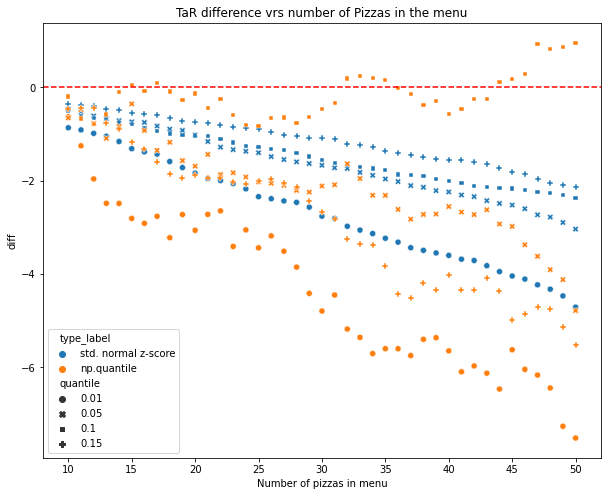

In [12]:
fig, axes = plt.subplots(figsize=(10, 8))
sns.scatterplot( data = tar_df.query('dim_pizza_menu <= 50'), x = 'dim_pizza_menu',\
                 y = 'diff', hue = 'type_label', style = 'quantile').set( title = 'TaR difference vrs number of Pizzas in the menu')
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.xlabel('Number of pizzas in menu')
plt.show()

It looks like the np.quantile indeed exhibits some numerical fluctuations, specifically for $q_{0.1}$ we get the worst result with the cross-over between sub-additive and non sub-additive results in the different regions of the number of pizzas in the menu. Also different from the $z-$ score is that the np.quantile differences vary substantialy across the y - axis and diverge wrt to other quantile